In [1]:
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt

# https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/
sf = shp.Reader("ne_10m_admin_0_countries.shp") 


In [2]:
# check where is the country
shapes = sf.shapeRecords();
shape = shapes[0]
shape.record[3].rstrip('\x00') #unicode error fix

'Indonesia'

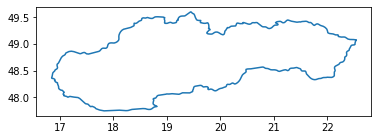

In [14]:
plt.figure()
ax = plt.axes()
ax.set_aspect('equal')
for shape in sf.shapeRecords():
    #print("==",shape.record[3], "==")
    if shape.record[3].rstrip('\x00') != 'Slovakia':
        continue
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()


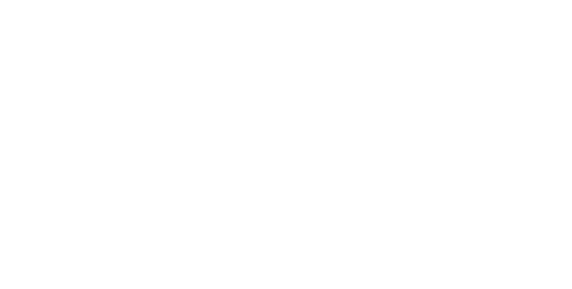

In [50]:
from pyproj import Transformer
transformer = Transformer.from_crs("epsg:4326", "epsg:3857")

x2=[]
y2=[]
for (xx,yy) in zip(x,y):
    (x_conv, y_conv) = transformer.transform(yy, xx)

    x2.append(x_conv)
    y2.append(y_conv)
    
fig = plt.figure()
fig.set_size_inches(10,10)
ax = plt.axes()
ax.set_aspect('equal')

plt.style.use('dark_background')
plt.axis('off')
ax.plot(x2,y2, color='white')
#plt.show()
plt.savefig('mapa.jpg', dpi=300)

In [54]:
import gpxpy #https://pypi.org/project/gpxpy/
import gpxpy.gpx

from os import listdir
from os.path import isfile, join
mypath = 'gpx-SNP'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]



fig = plt.figure()
fig.set_size_inches(192,108)
ax = plt.axes()
ax.set_aspect('equal')

plt.style.use('dark_background')
plt.axis('off')
ax.plot(x2,y2, color='white', linewidth=15)

x_track=[]
y_track=[]
for i, filename in enumerate(onlyfiles):
    print(filename)
    #if i>5:
    #    break
    gpx_file = open('gpx-SNP/'+filename, 'r', encoding="utf8")

    gpx = gpxpy.parse(gpx_file)
    for track in gpx.tracks:
        for segment in track.segments:
            points = [transformer.transform(point.latitude, point.longitude) for point in segment.points]
            x_track = [point[0] for point in points]
            y_track = [point[1] for point in points]
            ax.plot(x_track,y_track, color='white', linewidth=50)
            plt.savefig('mapa{:03d}.jpg'.format(i), dpi=10)
    


#plt.show()




210519 Dukla.gpx
210520 VysnaPisana.gpx
210521 Svidnik.gpx
210522 Cierna_hora.gpx
210523 Kohutov.gpx
210524 Zborov.gpx
210526 Ceresna.gpx
210527 Bardejov.gpx
210528 Hervartov.gpx
210529 Cergov.gpx
210530 Terna.gpx
210531 MalySaris.gpx
210601 Lubovec.gpx
210602 Mala_Lodina.gpx
210604 Kysak.gpx
210605 KralovaStudna.gpx
210606 Kavecany.gpx
210607 Sedlo_pod_Kamenn_m_hrbom.gpx
210608 Za_Lajosku_k_pramenu.gpx
210609 Trohanka.gpx
210610 Sedlo_Jedlovec.gpx
210611 Kupele_Stos.gpx
210613 Za_Osadnik.gpx
210614 Sedlo_Krive.gpx
210615 Pod_Holou.gpx
210616 Utulna_Galova.gpx
210617 Dedinky.gpx
210619 Cuntava.gpx
210620 Chata_pod_Kralovou_holou.gpx
210621 Andrejcova.gpx
210622 Helpa.gpx
210626 Devin_Karlovka.gpx
210627 Z_Karlovky_nad_Racu.gpx
210628 Salas_nad_Jurom.gpx
210629 Pezinska_baba.gpx
210630 Cermak.gpx
210701 Solosnica.gpx
210702 Amonova_luka.gpx
210703 Bukova.gpx
210705 Pred_Dobru_vodu.gpx
210706 Brezova_pod_Bradlom.gpx
210707 Polianka.gpx
210708 Stara_Myjava.gpx
210709 Velka_Javorina.gpx
21

# convert images to video
`ffmpeg.exe  -i mapa%03d.jpg -c:v libx264 -vf fps=25 -pix_fmt yuv420p mapa.mp4`